In [1]:
import pandas as pd
pd.set_option('display.max_columns', 60)

import numpy as np
import re
import json
from pathlib import Path
import re

import matplotlib.pyplot as plt
import scipy.stats as st

from master_thesis.src import utils

## Reading in data files

In [2]:
print(utils.DATA)

/home/ruecker/data/Daten_INWT/201001_dataNLP


In [3]:
bonn = utils.read_data('201001_Bonn.txt')                  # Generalanzeiger Bonn
NOZ = utils.read_data('201001_NOZ.txt')                    # Neue Osnabrücker Zeitung
aachener = utils.read_data('201001_aachener_zeitung.txt')  # Aachener Zeitung
SZ = utils.read_data('201001_SZ.txt')                      # Saarbrücker Zeitung
TV = utils.read_data('201001_TV.txt')                      # Trierscher Volksfreund

In [4]:
# 1. Datensatz:
# ((17534, 51), (20525, 51), (16965, 51), (26050, 51), (22972, 51))
# 2. Datensatz
# ((20015, 53), (22780, 53), (19596, 53), (28274, 53), (26180, 53))
# neu: Spalten 'ausreisser', 'zeilen'

In [5]:
bonn.shape, NOZ.shape, aachener.shape, SZ.shape, TV.shape
# neu: Spalten 'prozentDpa', 'prozentVerlag'

((15940, 55), (14388, 55), (17366, 55), (17439, 55), (19754, 55))

In [6]:
bonn.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein
49307861,5,3,4,2,58,NaN,58.000000,20.000000,60.000000,40.000000,100,1,4,1,8,8,10,27,sport,NaN,NaN,sieg-im-clasico-real-uebernimmt-tabellenfuehru...,https://www.general-anzeiger-bonn.de/sport/sie...,200301-99-145917,41,73,60,dpacat:sp,2020-03-01 22:57:29,NaN,Zusammenfassung,Spanien,NaN,"Primera Division__,__Madrid__,__Barcelona",NaN,NaN,"Spanische Fußball-Liga__,__Real Madrid__,__FC ...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Fußball,Disziplin,medtop:20001065,Dank eines 2:0-Sieges im Clásico gegen den FC ...,Madrid (dpa) - Real Madrid hat den 180. Clásic...,Sieg im Clásico: Real übernimmt Tabellenführun...,NaN,4,NaN,303,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein
49307973,754,263,386,180,67977,NaN,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,NaN,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,NaN,Gesamtzusammenfassung,"Deutschland__,__China__,__International",NaN,Covid-19,NaN,NaN,"PM der Senatsverwaltung für Gesundheit, Pflege...",NaN,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:edi__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,NaN,3,NaN,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein
49308023,31,7,10,4,3669,NaN,174.714286,67.741935,22.580645,12.903226,100,1,20,4,14,2,20,40,news,kultur-und-medien,ueberregional,dichter-und-theologe-ernesto-cardenal-gestorbe...,https://www.general-anzeiger-bonn.de/news/kult...,200301-99-146640,21,100,58,dpacat:ku,2020-03-02 00:01:03,NaN,Meldung,Nicaragua,NaN,NaN,NaN,NaN,"Brief der Regierung__,__Cardenal beim Frienden...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Literatur__,__Religion__,__Leute","Kunst und Unterhaltung__,__Religion, Weltansch...","medtop:20000013__,__dpasubject:458__,__medtop:...",NaN,Managua (dpa) - Der nicaraguanische Dichter un...,Dichter und Theologe Ernesto Cardenal gestorben,NaN,4,NaN,163,ku,0,NewsML-G2,2020-04-21 19:33:11,1,nein
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,NaN,Zusammenfassung,USA,NaN,NaN,NaN,NaN,Tweet Trump,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wahl__,__Partei","Politik__,__Politik (allgemein)","medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vo

In [7]:
bonn.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser'],
      dtype='object')

## Before concatenation: add a column with info about which publisher

In [8]:
bonn['publisher'] = 'bonn'
NOZ['publisher'] = 'NOZ'
aachener['publisher'] = 'aachener'
SZ['publisher'] = 'SZ'
TV['publisher'] = 'TV'

In [9]:
bonn.columns == NOZ.columns
NOZ.columns == aachener.columns 
aachener.columns == SZ.columns
SZ.columns == TV.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Concatenating all

In [11]:
combined = pd.concat([bonn, NOZ, aachener, SZ, TV], axis=0)

In [12]:
combined.shape

(84887, 56)

In [13]:
i_list = combined.index
i_set = set(i_list)
print(len(i_list))
print(len(i_set)) # all different IDs, good!

84887
84887


In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84887 entries, 49297055 to 53517573
Data columns (total 56 columns):
pageviews              84887 non-null int64
entrances              84887 non-null int64
exits                  84887 non-null int64
bounces                84887 non-null int64
timeOnPage             84887 non-null int64
conversions            0 non-null float64
avgTimeOnPage          84887 non-null float64
stickiness             84887 non-null float64
entranceRate           84887 non-null float64
bounceRate             84887 non-null float64
sharePageviews         84887 non-null int64
n                      84887 non-null int64
nObs                   84887 non-null int64
score_pageviews        84887 non-null int64
score_avgTimeOnPage    84887 non-null int64
score_entranceRate     84887 non-null int64
score_stickiness       84887 non-null int64
SCORE                  84887 non-null int64
kategorie              84885 non-null object
rubrik                 73947 non-null 

## One sample

In [15]:
print(combined.iloc[20000])
print(combined.iloc[20000].pagePath)

pageviews                                                             15
entrances                                                              2
exits                                                                  9
bounces                                                                2
timeOnPage                                                          4385
conversions                                                          NaN
avgTimeOnPage                                                    730.833
stickiness                                                            40
entranceRate                                                     13.3333
bounceRate                                                       13.3333
sharePageviews                                                       100
n                                                                      1
nObs                                                                  11
score_pageviews                                    

In [16]:
combined.info()
#df_raw = raw.fillna('') # replacing Nan with emtpy string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84887 entries, 49297055 to 53517573
Data columns (total 56 columns):
pageviews              84887 non-null int64
entrances              84887 non-null int64
exits                  84887 non-null int64
bounces                84887 non-null int64
timeOnPage             84887 non-null int64
conversions            0 non-null float64
avgTimeOnPage          84887 non-null float64
stickiness             84887 non-null float64
entranceRate           84887 non-null float64
bounceRate             84887 non-null float64
sharePageviews         84887 non-null int64
n                      84887 non-null int64
nObs                   84887 non-null int64
score_pageviews        84887 non-null int64
score_avgTimeOnPage    84887 non-null int64
score_entranceRate     84887 non-null int64
score_stickiness       84887 non-null int64
SCORE                  84887 non-null int64
kategorie              84885 non-null object
rubrik                 73947 non-null 

In [17]:
combined.describe().round(2)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,zeilen,prozentDpa,prozentVerlag,flextags,importance,lifetime,limbic,urgency,wikidata,wordcount,ratgeber,nLoadAttempts
count,84887.00,84887.00,84887.00,84887.00,84887.00,0.0,84887.00,84887.00,84887.00,84887.00,84887.0,84887.0,84887.00,84887.00,84887.00,84887.00,84887.00,84887.00,84887.00,84887.00,84887.00,0.0,0.0,0.0,0.0,84887.00,0.0,84887.00,84887.00,84887.0
mean,245.42,141.74,155.27,74.32,13552.95,NaN,106.52,44.03,48.40,20.33,100.0,1.0,85.04,4.72,8.90,7.26,14.15,35.04,39.01,93.98,63.06,NaN,NaN,NaN,NaN,3.71,NaN,328.28,0.06,1.0
std,6899.94,4581.08,4770.82,3103.00,440807.87,NaN,125.63,23.73,27.64,24.16,0.0,0.0,1671.52,7.26,5.35,6.20,5.70,11.11,27.09,15.04,16.00,NaN,NaN,NaN,NaN,0.50,NaN,222.05,0.24,0.0
min,1.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,100.0,1.0,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,NaN,NaN,NaN,NaN,2.00,NaN,7.00,0.00,1.0
25%,5.00,2.00,3.00,0.00,76.00,NaN,23.94,29.06,26.67,0.00,100.0,1.0,4.00,1.00,5.00,3.00,12.00,28.00,19.00,96.00,54.00,NaN,NaN,NaN,NaN,3.00,NaN,166.00,0.00,1.0
50%,14.00,5.00,7.00,2.00,542.00,NaN,77.00,45.00,50.00,11.97,100.0,1.0,11.00,2.00,10.00,4.00,15.00,34.00,30.00,99.00,65.00,NaN,NaN,NaN,NaN,4.00,NaN,251.00,0.00,1.0
75%,41.00,15.00,20.00,7.00,2531.50,NaN,149.27,60.00,66.67,33.33,100.0,1.0,31.00,5.00,13.00,11.00,18.00,40.00,56.00,100.00,75.00,NaN,NaN,NaN,NaN,4.00,NaN,466.00,0.00,1.0
max,1086222.00,853722.00,852704.00,631810.00,89717186.00,NaN,1972.00,100.00,100.00,100.00,100.0,1.0,264656.00,50.00,20.00,20.00,20.00,97.00,686.00,100.00,98.00,NaN,NaN,NaN,NaN,5.00,NaN,3263.00,1.00,1.0


In [18]:
# deprecated: im aktuellen Datensatz fehlt kein Text
# bei 2 fehlt 'text'
combined[combined['text'].isnull()]

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Creating dict with descriptions of columns from meta file

In [19]:
meta_dict = utils.create_meta_dict()

In [20]:
len(meta_dict)

53

In [21]:
meta_dict['pageviews']

'Anzahl Seitenaufrufe'

In [22]:
for var in meta_dict.keys():
    #if meta_dict[var] != 'tbi':
    #    print(var,':', meta_dict[var])
    print(var,':', meta_dict[var])

articleId : ID (aus CMS des Publishers)
pageviews : Anzahl Seitenaufrufe
entrances : Anzahl Einstiege
exits : Anzahl Ausstiege
bounces : Anzahl Bounces
timeOnPage : Verweil- oder Lesedauer in Sekunden (insgesamt)
conversions : Anzahl Registrierungen/Abos
avgTimeOnPage : durchschnittliche Verweil- oder Lesedauer in Sekunden
stickiness : Anteil der Leser, die im Anschluss an den Artikel auf der Publisher-Seite blieben
entranceRate : Anteil der Leser, die über den Artikel auf die Publisher-Seite kamen
bounceRate : Anteil der Leser, die Publisher-Seite direkt wieder verlassen haben
sharePageviews : tbi
n : tbi
nObs : tbi
score_pageviews : tbi
score_avgTimeOnPage : tbi
score_entranceRate : tbi
score_stickiness : tbi
SCORE : tbi
kategorie : Kategorie in der der Publisher den Artikel veröffentlicht hat
rubrik : Unter-Kategorie
subRubrik : UNter-Unter-Kategorie
titel : Titel (Publisher)
pagePath : URL
dpaGuid : ID aus dpa DWH
categoryCode : vm = "Vermischtes"
creationDate : tbi
flextags : tbi


In [23]:
combined.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'publisher'],
      dtype='object')

## (maybe better not!) Deleting colums with 'tbi' in meta_dict

In [24]:
#use_columns = [var for var in meta_dict.keys() if meta_dict[var] != 'tbi' and var != 'articleId']
#use_columns.extend(['zeilen', 'ausreisser', 'prozentDpa', 'prozentVerlag'])
#print(use_columns)

In [25]:
#combined = combined[use_columns]

In [26]:
combined.shape

(84887, 56)

In [27]:
combined[123:125]

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49333109,36,8,7,4,3814,NaN,131.517241,80.555556,22.222222,11.111111,100,1,27,4,13,2,20,39,news,digitale-welt,NaN,so-werden-tastatur-und-displays-super-sauber_a...,https://www.general-anzeiger-bonn.de/news/digi...,200226-99-84605,50,100,73,dpacat:vm,2020-03-03 04:26:01,NaN,KORR-Bericht,Deutschland,NaN,"Verbraucher__,__Ratgeber__,__Computer__,__Smar...",NaN,NaN,NaN,NaN,dpasrv:tmn,Technik,Technologie und Technik,dpasubject:300,"Brotkrümel, Staub und Fingerabdrücke - Tastatu...","Hamburg (dpa/tmn) - Es reicht mitunter, vor de...","Luft, Lappen, Spüli: So werden Tastatur und Di...",NaN,4,NaN,417,vm,1,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn
49333137,517,86,187,65,55754,NaN,168.951515,63.829787,16.634429,12.572534,100,1,259,20,14,2,19,55,news,politik,ausland,von-der-leyen-reist-an-griechische-eu-grenze_a...,https://www.general-anzeiger-bonn.de/news/poli...,200303-99-173331,106,99,85,dpacat:pl,2020-03-03 17:33:01,NaN,Gesamtzusammenfassung,"Griechenland__,__Türkei",NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","EU__,__Migration__,__Flüchtling","Internationale Organisation__,__Regierungspoli...","dpasubject:157__,__medtop:20000634__,__medtop:...",EU-Kommissionschefin von der Leyen und die and...,Kastanies/Istanbul/Berlin (dpa) - EU-Kommissio...,EU steht hinter Griechenland: «Nicht nur eine ...,NaN,3,NaN,876,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn


In [28]:
combined.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'publisher'],
      dtype='object')

In [29]:
combined.iloc[1000]

pageviews                                                              8
entrances                                                              6
exits                                                                  7
bounces                                                                6
timeOnPage                                                            14
conversions                                                          NaN
avgTimeOnPage                                                         14
stickiness                                                          12.5
entranceRate                                                          75
bounceRate                                                            75
sharePageviews                                                       100
n                                                                      1
nObs                                                                   8
score_pageviews                                    

In [30]:
# deprecated: nicht mehr nötig
#combined['text'].fillna('', inplace = True) # damit die zwei leeren Texte keine Probleme bereiten

## Adding columns with minimal preprocessed text, nr_tokens, nr_sentences, ...

In [31]:
combined = utils.add_meta_columns(combined)

# saving to disk!
combined.to_csv(utils.DATA / 'combined.tsv', sep = '\t', index = True)

preprocessing text...
counting tokens...
counting sentences...
averaging avgTimeOnPage per tokens etc...


In [32]:
combined.shape

(84887, 70)

In [33]:
combined.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,,...,"Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,,4,,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78
49307861,5,3,4,2,58,,58.000000,20.000000,60.000000,40.000000,100,1,4,1,8,8,10,27,sport,,,sieg-im-clasico-real-uebernimmt-tabellenfuehru...,https://www.general-anzeiger-bonn.de/sport/sie...,200301-99-145917,41,73,60,dpacat:sp,2020-03-01 22:57:29,,...,Disziplin,medtop:20001065,Dank eines 2:0-Sieges im Clásico gegen den FC ...,Madrid (dpa) - Real Madrid hat den 180. Clásic...,Sieg im Clásico: Real übernimmt Tabellenführun...,,4,,303,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Madrid,Real Madrid hat den 180. Clásico in der spanis...,304,5.536184,25,8,2026,21.0,14.476190,0.191419,1.414634,313.448276,0.028628,1
49307973,754,263,386,180,67977,,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,,...,"Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,,3,,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Berlin,Bei der Ausbreitung des neuen Coronavirus geht...,1059,5.956563,37,9,7480,68.0,15.573529,0.174759,1.477761,343.330244,0.024695,368
49308023,31,7,10,4,3669,,174.714286,67.741935,22.580645,12.903226,100,1,20,4,14,2,20,40,news,kultur-und-medien,ueberregional,dichter-und-theologe-ernesto-cardenal-gestorbe...,https://www.general-anzeiger-bonn.de/news/kult...,200301-99-146640,21,100,58,dpacat:ku,2020-03-02 00:01:03,,...,"Kunst und Unterhaltung__,__Religion, Weltansch...","medtop:20000013__,__dpasubject:458__,__medtop:...",,Managua (dpa) - Der nicaraguanische Dichter un...,Dichter und Theologe Ernesto Cardenal gestorben,,4,,163,ku,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Managua,Der nicaraguanische Dichter und Theologe Ernes...,164,5.981707,0,6,1156,12.0,13.666667,1.071867,8.319728,55.977105,0.151137,21
49308055,333,80,134,60,44755,,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,,...,"Politik__,__Politik (allgemein)","medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vorwahl d...,Washington (dpa) - Kurz vor den Vorwahlen am «...,Buttigieg gibt vor Vorwahlen am «Super Tuesday...,,3,,767,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bon

## Reading in combined dataframe with added colums

In [29]:
df = pd.read_csv(utils.DATA / 'combined.tsv', sep = '\t', index_col = 'articleId')

In [30]:
df.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'publisher',
       'city', 'text_preprocessed', 'nr_tokens', 'mean_token_length',
       'nr_tokens_teaser', 'nr_tokens_titelH1', 'nr_char', 'nr_sentences',
       'mean_sentence_length', 'avgTimeOnPagePerWordco

In [31]:
df.head(2)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,...,"Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78
49307861,5,3,4,2,58,NaN,58.000000,20.000000,60.000000,40.000000,100,1,4,1,8,8,10,27,sport,NaN,NaN,sieg-im-clasico-real-uebernimmt-tabellenfuehru...,https://www.general-anzeiger-bonn.de/sport/sie...,200301-99-145917,41,73,60,dpacat:sp,2020-03-01 22:57:29,NaN,...,Disziplin,medtop:20001065,Dank eines 2:0-Sieges im Clásico gegen den FC ...,Madrid (dpa) - Real Madrid hat den 180. Clásic...,Sieg im Clásico: Real übernimmt Tabellenführun...,NaN,4,NaN,303,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Madrid,Real Madrid hat den 180. Clásico in der spanis...,304,5.536184,25,8,2026,21.0,14.476190,0.191419,1.414634,313.448276,0.028628,1


In [32]:
df.shape

(84887, 70)

In [33]:
# in älterer Version gab es zwei Artikel ohne Text
df = df[df['nr_tokens'] > 0]

In [34]:
df.shape

(84887, 70)

In [35]:
df.ausreisser.value_counts()

nein    79793
ja       5094
Name: ausreisser, dtype: int64

In [36]:
print(len(df[df.zeilen == 0]))
print(len(df[df.zeilen <= 9]))
print(len(df[df.zeilen >= 10]))

print(len(df[df.avgTimeOnPage == 0]))


60
3695
81192
8198


In [37]:
df = df[df.zeilen > 0]
df = df[df.avgTimeOnPage > 0]

In [38]:
df.shape

(76629, 70)

In [39]:
show_columns = ['pageviews', 'pageviews-exits', 'stickiness', 'bounceRate', 'timeOnPage', 'avgTimeOnPage', 
                'avgTimeOnPagePerWordcount', 'tokensPerMinute', 'avgTimeOnPagePerRow', 'wordcount', 'zeilen',
                'prozentDpa', 'prozentVerlag']

In [40]:
df[show_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,tokensPerMinute,avgTimeOnPagePerRow,wordcount,zeilen,prozentDpa,prozentVerlag
count,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00
mean,271.29,99.73,48.70,18.48,14988.71,117.84,0.48,1157.03,4.31,335.45,39.69,94.37,63.73
std,7261.72,2783.15,19.90,20.26,463926.87,126.98,0.79,3987.90,12.66,225.15,27.23,14.42,15.66
min,1.00,1.00,1.10,0.00,1.00,0.17,0.00,1.30,0.00,7.00,1.00,1.00,1.00
25%,7.00,3.00,33.33,0.00,148.00,39.50,0.14,107.59,1.20,170.00,19.00,96.00,55.00
50%,16.00,8.00,49.61,12.09,738.00,89.00,0.29,203.76,2.50,258.00,31.00,99.00,66.00
75%,47.00,23.00,62.50,30.00,2977.00,158.12,0.56,438.00,4.66,476.00,56.00,100.00,76.00
max,1086222.00,534356.00,100.00,98.35,89717186.00,1972.00,46.05,144000.00,1796.00,3263.00,686.00,100.00,98.00


In [43]:
#df.sort_values('prozentVerlag', ascending=False).head()
df.sort_values('avgTimeOnPagePerRow', ascending=False).head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49364595,3,2,2,2,1796,NaN,1796.0,33.333333,66.666667,66.666667,100,1,3,1,20,11,13,45,news,ticker,NaN,ramelow-faellt-bei-ministerpraesidentenwahl-im...,https://www.general-anzeiger-bonn.de/news/tick...,200303-99-169093,1,100,14,dpacat:pl,2020-03-04 14:34:48,NaN,...,"Parlament__,__Politik","dpasubject:590__,__medtop:20000593",NaN,Erfurt (dpa) - Bei der Wahl des Thüringer Mini...,Ramelow fällt bei Ministerpräsidentenwahl im e...,NaN,2,NaN,39,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Erfurt,Bei der Wahl des Thüringer Ministerpräsidenten...,36,6.638889,0,8,277,2.0,18.000000,46.051282,1796.0,1.302895,6.483755,1
49635683,1,1,0,0,1688,NaN,1688.0,100.000000,100.000000,0.000000,100,1,1,1,20,20,20,61,news,ticker,NaN,corona-ezb-legt-notkaufprogramm-in-hoehe-von-7...,https://www.general-anzeiger-bonn.de/news/tick...,200319-99-386371,1,100,26,dpacat:wi,2020-03-19 00:35:58,NaN,...,"Medizin, Gesundheit__,__Krankheit__,__Wirtscha...","dpasubject:346__,__medtop:20000446__,__dpasubj...",NaN,Frankfurt/Main (dpa) - Im Kampf gegen wirtscha...,Corona: EZB legt Notkaufprogramm in Höhe von 7...,NaN,2,NaN,44,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Frankfurt/Main,Im Kampf gegen wirtschaftliche Folgen der Coro...,41,6.317073,0,11,302,2.0,20.500000,38.363636,1688.0,1.563981,5.589404,1
52779577,5,4,4,0,1402,NaN,1402.0,20.000000,80.000000,0.000000,100,1,5,1,20,16,10,47,nachrichten,topthemen,eilmeldung,reisewarnung-des-auswaertigen-amts-fuer-fast-g...,https://www.volksfreund.de/nachrichten/topthem...,200814-99-166661,2,80,23,dpacat:wi,2020-08-14 19:34:31,NaN,...,"Reise__,__Freizeit__,__Freizeit, Modernes Lebe...","medtop:20000564__,__medtop:20000563__,__medtop...",NaN,Berlin (dpa) - Wegen der gestiegenen Zahl von ...,Reisewarnung des Auswärtigen Amts für fast gan...,NaN,2,NaN,44,wi,0,NewsML-G2,2020-08-19 13:20:04,1,nein,TV,Berlin,Wegen der gestiegenen Zahl von Corona-Neuinfek...,41,6.097561,0,10,293,2.0,20.500000,31.863636,701.0,1.883024,4.784983,1
50323769,4,1,1,1,1446,NaN,482.0,75.000000,25.000000,25.000000,100,1,3,1,19,2,20,42,news,ticker,NaN,bund-will-bis-6-mai-konzept-fuer-schulen-kitas...,https://www.general-anzeiger-bonn.de/news/tick...,200430-99-893815,1,100,13,dpacat:pl,2020-04-30 13:41:41,NaN,...,"Medizin, Gesundheit__,__Krankheit__,__Regierun...","dpasubject:346__,__medtop:20000446__,__medtop:...",NaN,Berlin (dpa) - Der Bund will bis zum 6. Mai ei...,"Bund will bis 6. Mai Konzept für Schulen, Kita...",NaN,2,NaN,74,pl,0,NewsML-G2,2020-05-01 03:50:32,1,ja,bonn,Berlin,Der Bund will bis zum 6. Mai ein Konzept zur w...,71,6.507042,0,12,537,3.0,23.666667,6.513514,482.0,9.211618,0.897579,3
49731927,5,2,3,2,898,NaN,449.0,40.000000,40.000000,40.000000,100,1,3,1,18,4,14,37,news,ticker,NaN,dfl-praesidium-empfiehlt-bundesliga-pause-bis-...,https://www.general-anzeiger-bonn.de/news/tick...,200324-99-449777,1,100,18,dpacat:sp,2020-03-24 16:46:25,NaN,...,"Disziplin__,__Medizin, Gesundheit__,__Krankheit","medtop:20001065__,__dpasubject:346__,__medtop:...",NaN,Frankfurt/Main (dpa) - Der Spielbetrieb in der...,DFL-Präsidium empfiehlt Bundesliga-Pause bis z...,NaN,2,NaN,44,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Frankfurt/Main,Der Spielbetrieb in der 1. und 2. Fußball-Bund...,41,6

In [42]:
IDs = [0,1,2,3,4,5,2000, 40000, 50000, 600]
for ID in IDs:
    print(df.iloc[ID].titel)
    print(df.iloc[ID].pagePath)
    print(df.iloc[ID].titelH1)
    print(df.iloc[ID].prozentDpa)
    print(df.iloc[ID].prozentVerlag)
    print("---")

unfall-an-strassenbahn-halt-verletzte-noch-in-lebensgefahr_aid-49297055
https://www.general-anzeiger-bonn.de/news/panorama/unfall-an-strassenbahn-halt-verletzte-noch-in-lebensgefahr_aid-49297055
Nach Unfall an Haltestelle in Essen noch ein Mensch in Lebensgefahr
100
52
---
sieg-im-clasico-real-uebernimmt-tabellenfuehrung_aid-49307861
https://www.general-anzeiger-bonn.de/sport/sieg-im-clasico-real-uebernimmt-tabellenfuehrung_aid-49307861
Sieg im Clásico: Real übernimmt Tabellenführung in Spanien
73
60
---
coronavirus-erste-infektion-in-berlin_aid-49307973
https://www.general-anzeiger-bonn.de/news/panorama/coronavirus-erste-infektion-in-berlin_aid-49307973
Covid-19: Spahn gegen Grenzschließungen - Experte: «milde Erkrankung»
100
82
---
dichter-und-theologe-ernesto-cardenal-gestorben_aid-49308023
https://www.general-anzeiger-bonn.de/news/kultur-und-medien/ueberregional/dichter-und-theologe-ernesto-cardenal-gestorben_aid-49308023
Dichter und Theologe Ernesto Cardenal gestorben
100
58
---
u

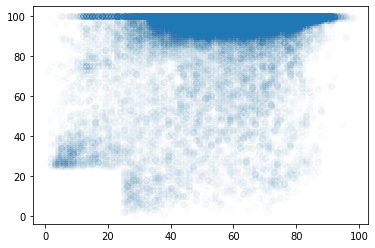

In [44]:
plt.scatter(df.prozentVerlag, df.prozentDpa, alpha=0.02)

In [47]:
#plt.scatter(df.prozentVerlag, df.avgTimeOnPage, alpha = 0.02)

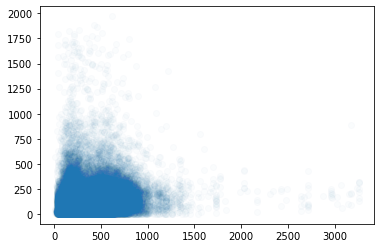

In [52]:
#plt.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha=0.02)
plt.scatter(df.wordcount, df.avgTimeOnPage, alpha=0.02)

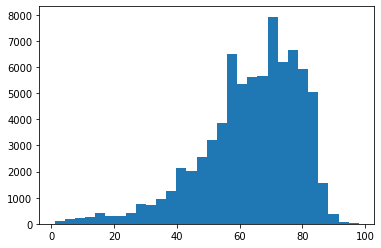

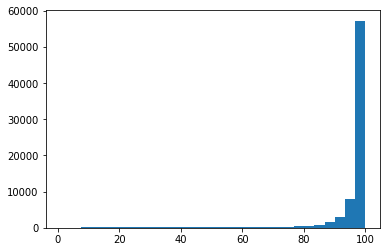

In [53]:
plt.hist(df.prozentVerlag, 30)
plt.show()
plt.hist(df.prozentDpa, 30)
plt.show()

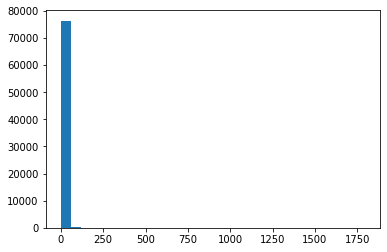

4.312158032815368


In [57]:
plt.hist(df.avgTimeOnPagePerRow, 30)
plt.show()
print(np.mean(df.avgTimeOnPagePerRow))

(-0.2468466933519962, 0.0)


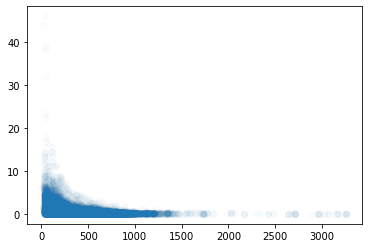

In [68]:
plt.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha = 0.02)
print(st.pearsonr(df.wordcount, df.avgTimeOnPagePerWordcount))

(0.18783602408669456, 0.0)


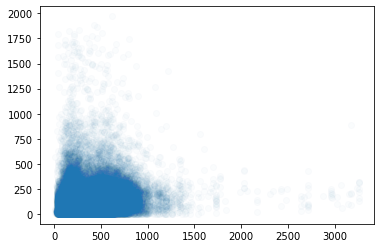

In [69]:
plt.scatter(df.wordcount, df.avgTimeOnPage, alpha = 0.02)
print(st.pearsonr(df.wordcount, df.avgTimeOnPage))

In [58]:
df_cond = utils.get_conditioned_df()

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (7902, 73)


In [59]:
df_cond.ausreisser.value_counts()

nein    7902
Name: ausreisser, dtype: int64

In [60]:
df_cond[show_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,tokensPerMinute,avgTimeOnPagePerRow,wordcount,zeilen,prozentDpa,prozentVerlag
count,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00
mean,959.83,360.40,52.00,17.56,55810.02,150.64,0.49,190.84,4.06,389.99,46.99,96.99,70.75
std,4139.45,912.06,16.09,15.91,169939.96,70.78,0.33,158.40,2.73,201.29,23.88,5.35,9.29
min,56.00,50.00,3.48,0.00,935.00,13.61,0.05,16.03,0.34,76.00,10.00,54.00,50.00
25%,138.00,74.00,39.50,5.38,10016.00,107.12,0.27,94.07,2.22,216.00,26.00,97.00,64.00
50%,263.00,129.00,54.13,12.44,19031.50,144.63,0.41,146.47,3.35,343.00,42.00,99.00,72.00
75%,700.75,312.00,64.88,25.47,44972.00,184.82,0.64,224.34,5.22,554.00,66.00,100.00,78.00
max,219962.00,26895.00,95.52,94.34,6311742.00,1047.72,3.74,1192.77,33.18,1027.00,100.00,100.00,96.00


(array([1.503e+03, 2.545e+03, 1.650e+03, 1.039e+03, 5.380e+02, 2.880e+02,
        1.620e+02, 8.000e+01, 3.900e+01, 2.400e+01, 1.000e+01, 7.000e+00,
        5.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.05030312, 0.23488825, 0.41947337, 0.6040585 , 0.78864362,
        0.97322874, 1.15781387, 1.34239899, 1.52698412, 1.71156924,
        1.89615437, 2.08073949, 2.26532462, 2.44990974, 2.63449487,
        2.81907999, 3.00366512, 3.18825024, 3.37283537, 3.55742049,
        3.74200562]),
 <BarContainer object of 20 artists>)

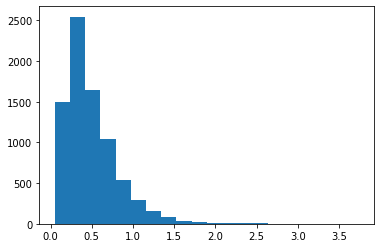

In [63]:
plt.hist(df_cond.avgTimeOnPagePerWordcount, 20)
#plt.hist(df_cond.avgTimeOnPagePerRow, 20)

(-0.6211887000382036, 0.0)


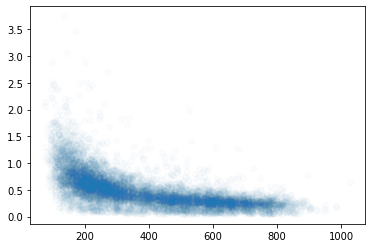

In [67]:
plt.scatter(df_cond.wordcount, df_cond.avgTimeOnPagePerWordcount, alpha = 0.02)
print(st.pearsonr(df_cond.wordcount, df_cond.avgTimeOnPagePerWordcount))

(0.22967704375151346, 4.2018637163680615e-95)


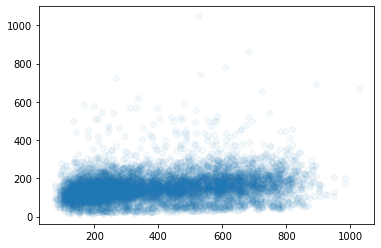

In [65]:
plt.scatter(df_cond.wordcount, df_cond.avgTimeOnPage, alpha = 0.05)
print(st.pearsonr(df_cond.wordcount, df_cond.avgTimeOnPage))

In [70]:
#df_cond.sort_values(by=['avgTimeOnPage'], ascending = False)
#df_cond.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
df_cond.sort_values(by=['avgTimeOnPagePerRow'], ascending = False)

,articleId,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,...,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
24404,2080646,483,393,400,83,41308,NaN,497.686747,17.184265,81.366460,17.184265,100,1,173,19,19,17,9,64,deutschland-und-welt,wirtschaft,NaN,keine-kreuzfahrten-mit-aida-cruises-bis-ende-a...,https://www.noz.de/deutschland-und-welt/wirtsc...,200702-99-648774,15,100,57,dpacat:wi,2020-07-02 14:13:36,...,NaN,Rostock (dpa) - Die Kreuzfahrtreederei Aida Cr...,Keine Kreuzfahrten mit Aida Cruises bis Ende A...,NaN,4,NaN,133,wi,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Rostock,Die Kreuzfahrtreederei Aida Cruises hat ihre F...,146,5.095890,0,10,888,9.0,16.222222,3.742006,33.179116,16.034182,0.560458,83,8.866667,1
22542,2067692,6630,6138,6117,1898,300831,NaN,586.415205,7.737557,92.579186,28.627451,100,1,3071,44,20,20,5,89,deutschland-und-welt,niedersachsen,NaN,usa-verlegen-soldaten-fuer-defender-uebung-nac...,https://www.noz.de/deutschland-und-welt/nieder...,200611-99-387033,21,100,73,dpacat:pl,2020-06-11 10:19:21,...,NaN,Berlin (dpa) - Die USA verlegen für die wegen ...,USA verlegen 600 Soldaten für «Defender»-Übung...,NaN,4,NaN,169,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Berlin,Die USA verlegen für die wegen der Corona-Pand...,172,6.145349,0,11,1240,14.0,12.285714,3.469912,27.924534,17.291503,0.472915,513,8.047619,1
28632,2112603,2546,2365,2405,1123,102262,NaN,725.262411,5.538099,92.890809,44.108405,100,1,886,34,20,20,5,79,deutschland-und-welt,vermischtes,NaN,asteroid-rast-dicht-an-der-erde-vorbei,https://www.noz.de/deutschland-und-welt/vermis...,200828-99-348195,27,100,61,dpacat:vm,2020-08-31 11:11:43,...,NaN,Köln (dpa) - Ein mehrfamilienhausgroßer Astero...,Mehrfamilienhaus im Anflug: Asteroid rast dich...,NaN,3,NaN,268,vm,0,NewsML-G2,2020-09-01 03:32:14,1,nein,NOZ,Köln,Ein mehrfamilienhausgroßer Asteroid wird am Di...,279,5.340502,0,10,1789,14.0,19.928571,2.706203,26.861571,22.171286,0.405401,141,9.925926,1
16374,2011569,1681,606,810,187,244624,NaN,280.854191,51.814396,36.049970,11.124331,100,1,606,32,16,3,17,68,deutschland-und-welt,vermischtes,NaN,kampf-gegen-coronavirus-italien-riegelt-norden-ab,https://www.noz.de/deutschland-und-welt/vermis...,200308-99-234103,11,100,82,dpacat:vm,2020-03-08 02:49:17,...,NaN,Rom (dpa) - Im Kampf gegen die Ausbreitung des...,Coronavirus: Italien will weitere Teile im Nor...,NaN,3,NaN,97,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Rom,Im Kampf gegen die Ausbreitung des neuartigen ...,94,6.159574,0,8,682,7.0,13.428571,2.895404,25.532199,20.722497,0.411810,871,8.818182,1
33813,50013701,307,170,206,127,27437,NaN,271.653465,32.899023,55.374593,41.368078,100,1,194,15,16,7,13,51,nrw-region,NaN,NaN,bitte-bleiben-sie-zu-hause,https://www.aachener-zeitung.de/nrw-region/bit...,200410-99-664796,11,100,54,dpacat:pl,2020-04-10 19:22:16,...,NaN,Düsseldorf (dpa) - Die Innenminister der Niede...,Innenminister von NRW und Niederlanden: «Bitte...,NaN,4,NaN,113,pl,0,NewsML-G2,2020-04-21 19:52:18,1,nein,aachener,Düsseldorf,Die Innenminister der Niederlande und Nordrhei...,114,5.798246,0,12,785,6.0,19.000000,2.404013,24.695770,24.958268,0.346055,101,10.272727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55221,5123908

In [65]:
df_cond[df_cond.avgTimeOnPagePerRow > 10]

,articleId,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,...,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
64,49318053,4339,3089,2997,2317,255559,NaN,190.431446,30.928785,71.191519,53.399401,100,1,1668,39,14,13,13,79,news,panorama,NaN,polizei-ermittelt-nach-vermutetem-diebstahl-vo...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153809,15,100,54,dpacat:vm,2020-03-02 12:54:36,...,NaN,Diepholz (dpa) - Die Polizei geht einem mutmaß...,Polizei ermittelt nach vermutetem Diebstahl vo...,NaN,4,NaN,107,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Diepholz,Die Polizei geht einem mutmaßlichen Diebstahl ...,104,6.346154,0,7,775,9.0,11.555556,1.779733,12.695430,33.712920,0.245718,1342,7.133333,1
187,49341973,186,30,60,18,24650,NaN,195.634921,67.741935,16.129032,9.677419,100,1,105,12,14,2,20,48,sport,fussball,NaN,bundesliga-ab-2021-22-zehnmal-am-sonntag-um-19...,https://www.general-anzeiger-bonn.de/sport/fus...,200303-99-169739,17,100,53,dpacat:sp,2020-03-03 13:27:59,...,NaN,Frankfurt/Main (dpa) - Die Fußball-Bundesliga ...,Bundesliga spielt ab 2021/22 zehnmal am Sonnta...,NaN,3,NaN,158,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Frankfurt/Main,Die Fußball-Bundesliga spielt ab der Saison 20...,173,5.803468,0,10,1203,12.0,14.416667,1.238196,11.507937,48.457606,0.162623,126,9.294118,1
310,49364091,182,92,101,65,16184,NaN,199.802469,44.505495,50.549451,35.714286,100,1,102,12,14,5,15,46,news,wirtschaft,ueberregional,real-beschliesst-noch-vor-verkauf-aus-fuer-sie...,https://www.general-anzeiger-bonn.de/news/wirt...,200304-99-185103,18,99,59,dpacat:wi,2020-03-04 12:56:35,...,NaN,Düsseldorf (dpa) - Noch bevor der Verkauf an d...,Real beschließt noch vor Verkauf Aus für siebe...,NaN,3,NaN,160,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Düsseldorf,Noch bevor der Verkauf an den russischen Inves...,158,6.082278,0,9,1134,10.0,15.800000,1.248765,11.100137,48.047454,0.176193,81,8.888889,1
494,49398409,476,338,357,257,28655,NaN,240.798319,25.000000,71.008403,53.991597,100,1,197,19,15,13,11,58,news,panorama,NaN,r-kelly-plaediert-erneut-auf-nicht-schuldig_ai...,https://www.general-anzeiger-bonn.de/news/pano...,200305-99-207182,17,100,60,dpacat:vm,2020-03-05 20:18:50,...,NaN,Chicago (dpa) - Der Prozess gegen den US-Popsä...,R. Kelly plädiert erneut auf nicht schuldig - ...,NaN,4,NaN,127,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Chicago,Der Prozess gegen den US-Popsänger R. Kelly (5...,129,5.798450,0,9,893,10.0,12.900000,1.896050,14.164607,31.644739,0.269651,119,7.470588,1
665,49425867,2660,1383,1485,1004,169183,NaN,143.985532,44.172932,51.992481,37.744361,100,1,669,35,13,5,15,68,news,panorama,NaN,quarantaene-unterkunft-in-china-eingestuerzt_a...,https://www.general-anzeiger-bonn.de/news/pano...,200307-99-229837,13,90,50,dpacat:vm,2020-03-07 22:08:17,...,NaN,Peking (dpa) - Ein als Quarantäne-Unterkunft g...,Quarantäne-Unterkunft in China eingestürzt,NaN,3,NaN,103,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Peking,Ein als Quarantäne-Unterkunft genutztes Hotel ...,100,6.260000,0,4,737,6.0,16.666667,1.397918,11.075810,42.920979,0.195367,1175,7.923077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45073,52916049,122,18,42,11,14444,NaN,180.55000

In [66]:
#df.iloc[0] # one example

In [67]:
#utils.show_article(ID=46567279, df = df) #48623259 # 50175481

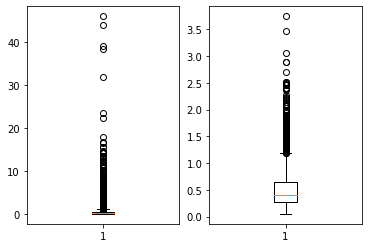

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.avgTimeOnPagePerWordcount)
ax2.boxplot(df_cond.avgTimeOnPagePerWordcount)

fig.show()

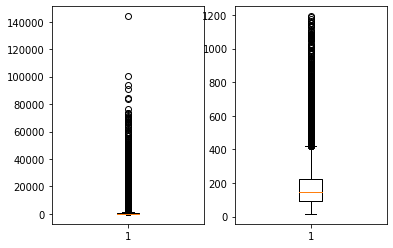

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.tokensPerMinute)
ax2.boxplot(df_cond.tokensPerMinute)

fig.show()

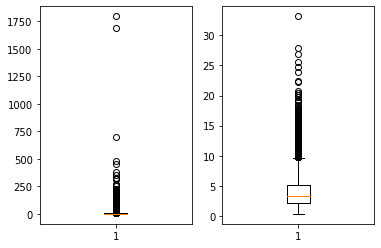

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.avgTimeOnPagePerRow)
ax2.boxplot(df_cond.avgTimeOnPagePerRow)

fig.show()

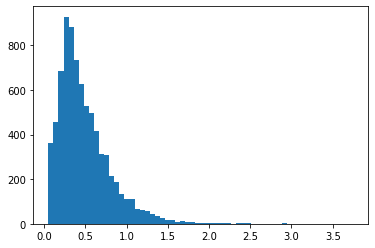

In [70]:
plt.hist(df_cond.avgTimeOnPagePerWordcount, density=False, bins=60)
plt.show()

## looking at genre, rubrik, kategorie, keywords, ...

In [63]:
def get_meta_file_categorical_variable(column_name, seperator="__,__"):
    value_set = set()
    for d in df[column_name]:
        candidates = d.split(seperator)
        for c in candidates:
            value_set.add(c.strip())
    value_df = pd.DataFrame(data=0, index = df.index, columns = sorted(list(value_set)))
    for i, value in df[column_name].items():
        candidates = value.split(seperator)
        for c in candidates:
            value_df.loc[i, c.strip()] = 1
    return value_df

In [22]:
# das funktioniert gerade nicht mehr, da Spalte city nicht mehr da
#df_city = get_meta_file_categorical_variable('city', seperator="/")
#df_city.to_csv('meta_file_city.csv', index=True) # save to file
#print(df_city.sum(axis=0))

In [23]:
df_geoArea = get_meta_file_categorical_variable('geoArea')
#df_geoArea.to_csv('meta_file_geoArea.csv', index=True) # save to file
print(df_geoArea.sum(axis=0))

NameError: name 'get_meta_file_categorical_variable' is not defined

In [65]:
df_genre = get_meta_file_categorical_variable('genre')
df_genre.to_csv('meta_file_genre.csv', index=True) # save to file
print(df_genre.sum(axis=0))

Achtung                           5
Chronologie                       1
Dokumentation                     4
Extra                           122
Faktencheck                      24
Feiertagszusammenfassung         31
Fragen & Antworten              131
Fragen und Antworten             82
Gesamtzusammenfassung           151
Hintergrund                      53
Hintergrund - Chronologie         1
Hintergrund - Dokumentation       5
Hintergrund - Kurzporträt         2
Hintergrund - Pro & Kontra        8
Interview                        87
KORR-Bericht                   1565
Kurzporträt                       2
Meldung                        9955
Nachrichtenüberblick            299
Porträt                         111
Pro und Kontra                    4
Reportage                         5
Themendienst-Gespräch            21
Umfrage                           3
Vorausmeldung                    34
Vorbericht                       92
Vorschau                         21
Wochenendzusammenfassung    

In [66]:
df_rubrik = get_meta_file_categorical_variable('rubrik')
df_rubrik.to_csv('meta_file_rubrik.csv', index=True) # save to file
print(df_rubrik.sum(axis=0))

                          1944
ahr-und-rhein                1
anzeigen                   103
beuel                        1
digitale-welt              610
essen-und-trinken          154
extern-fernsehprogramm       1
familie                    183
fckoeln                     13
fit-und-gesund             267
formel1                    193
fussball                  2868
geld-und-karriere          446
haus-und-garten            298
kindernachrichten           23
kino                       263
koeln-und-rheinland         52
kommentare                  27
kreis-neuwied                1
kultur-und-medien          547
mehr-sport                 873
mode-und-lifestyle          49
news                       357
panorama                  2121
politik                   2122
region-erleben               1
regional                     8
reise                      338
sieg-und-rhein               4
stadt-bonn                  11
telekom-baskets-bonn         4
ticker                    1679
tier-und

In [67]:
df.subRubrik.value_counts() # ?????

                                  11166
ueberregional                      2453
www.general-anzeiger-bonn.de       1292
deutschland                        1126
ausland                             995
steuern-und-recht-und-finanzen      262
studium-und-beruf                   123
advertorials                        103
regional                              5
ga.de                                 4
troisdorf                             3
siegburg                              1
mehr-von-ahr-und-rhein                1
Name: subRubrik, dtype: int64

In [68]:
df_kategorie = get_meta_file_categorical_variable('kategorie')
df_kategorie.to_csv('meta_file_kategorie.csv', index=True) # save to file
print(df_kategorie.sum(axis=0))

bonn          12
corona         1
freizeit     603
https:      1296
meinung       27
news        9090
ratgeber    1473
region        59
sport       4512
verkehr      357
verlag       103
wetter         1
dtype: int64


In [69]:
df_keywords = get_meta_file_categorical_variable('keywords')
df_keywords.to_csv('meta_file_keywords.csv', index=True) # save to file
print(df_keywords.sum(axis=0))

                       4232
#Covid-19                 2
#EU2020DE                 9
#MeToo                   24
#Metoo                    1
                       ... 
Übersicht                 2
Überstunden               2
Überwachungskameras       1
Überweisung               1
übernachten               1
Length: 4433, dtype: int64


In [70]:
df_subject = get_meta_file_categorical_variable('subject')
df_subject.to_csv('meta_file_subject.csv', index=True) # save to file
print(df_subject.sum(axis=0))

              18
Abfall        13
Abrüstung      4
Abtreibung     1
Adel          45
              ..
skak           1
xadrez         6
Ärzte         14
Öl            37
国际象棋           3
Length: 335, dtype: int64


In [72]:
df_category = get_meta_file_categorical_variable('category')
df_category.to_csv('meta_file_category.csv', index=True) # save to file
print(df_category.sum(axis=0))

ku     861
pl    3202
rs       8
sp    5563
vm    5443
wi    2457
dtype: int64


In [105]:
# Liste von category
categories = utils.get_set_of_meta_cat('category')
categories

['ku', 'pl', 'rs', 'sp', 'vm', 'wi']

In [71]:
# Liste von "subjects"
subjects = utils.get_set_of_meta_cat('subject')
subjects

['Unnamed: 1',
 'Abfall',
 'Abrüstung',
 'Abtreibung',
 'Adel',
 'Affären',
 'Agrar',
 'Alternative-Energie',
 'American football',
 'Arbeit',
 'Arbeitgeber',
 'Arbeitslosigkeit',
 'Arbeitsmarkt',
 'Architektur',
 'Archäologie',
 'Armut',
 'Arzneimittel',
 'Atom',
 'Atomenergie',
 'Atomunglück',
 'Auktion',
 'Ausbildung',
 'Ausländer',
 'Ausschreitung',
 'Ausstellungen',
 'Auszeichnungen',
 'Automobilindustrie',
 'Autonomie',
 'Außenhandel',
 'Badminton',
 'Bahn',
 'Bank',
 'Baseball',
 'Basketball',
 'Bau',
 'Beachvolleyball',
 'Behindertensport',
 'Behinderter',
 'Behörden',
 'Bekleidung',
 'Bergbau',
 'Bevölkerung',
 'Biathlon',
 'Bibliotheken',
 'Bildung',
 'Bob',
 'Bogenschießen',
 'Boxen',
 'Brauchtum',
 'Bundesbank',
 'Bundesländer',
 'Bundespräsident',
 'Bundesrat',
 'Bundesregierung',
 'Bundestag',
 'Börse',
 'Bürgerschaft',
 'Chemie',
 'Computer',
 'Dart',
 'Datenschutz',
 'Demonstration',
 'Denkmäler',
 'Dienstleistung',
 'Diplomatie',
 'Doping',
 'Dürre',
 'EU',
 'EZB',
 'E

In [73]:
test = utils.get_articles_where(df, meta_cat = 'subject', label = 'Verbraucher')
test

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48619747,261,42,86,23,25715,,146.942857,67.049808,16.091954,8.812261,news,wirtschaft,ueberregional,deutsche-bahn-informiert-ueber-investitionen-f...,https://www.general-anzeiger-bonn.de/news/wirt...,200129-99-685064,dpacat:wi,Zusammenfassung,Deutschland,,Investitionspläne Deutsche Bahn,"Bahn__,__Bau__,__Verkehr__,__Verbraucher",Die Deutsche Bahn erneuert ihr Gleisnetz - und...,"Berlin (dpa) - Bevor es besser rollt, rollt es...","Baustellen in Sicht: Bahn investiert 12,2 Mill...",,572,wi,"Berlin (dpa) - Bevor es besser rollt, rollt es...",591,5.683587,41,8,4013,39.0,15.153846,0.256893,0.036617,175
48619915,39,14,15,8,3881,,161.708333,61.538462,35.897436,20.512821,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,nur-aufheben-was-man-wirklich-braucht_aid-4861...,https://www.general-anzeiger-bonn.de/ratgeber/...,200123-99-603173,dpacat:vm,KORR-Bericht,Deutschland,"Ratgeber__,__Geld__,__Unterlagen__,__Dokumente...",,"Verbraucher__,__Recht__,__Finanzen","Die Tage werden langsam wieder länger, die Son...","Berlin (dpa/tmn) - Kontoauszüge, Vertragsunter...","Unterlagen sortieren: Nur aufheben, was man wi...",,583,vm,"Berlin (dpa/tmn) - Kontoauszüge, Vertragsunter...",609,5.620690,28,8,4101,38.0,16.026316,0.277373,0.039431,24
48620135,26,12,13,9,2397,,184.384615,50.000000,46.153846,34.615385,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,vor-und-nacherbschaft-kann-aufgeloest-werden_a...,https://www.general-anzeiger-bonn.de/ratgeber/...,200108-99-389215,dpacat:vm,Meldung,Deutschland,"Ratgeber__,__Eltern__,__Kinder__,__Erbauseinan...",,"Verbraucher__,__Recht__,__Familie","Wer Vermögen aufgebaut hat, will es an die näc...",Frankfurt/Main (dpa/tmn) - Vermögen über mehre...,Vor- und Nacherbschaft kann aufgelöst werden,,217,vm,Frankfurt/Main (dpa/tmn) - Vermögen über mehre...,214,6.088785,28,6,1554,17.0,12.588235,0.849699,0.118652,13
48620231,43,6,11,5,4840,,151.250000,74.418605,13.953488,11.627907,ratgeber,tier-und-wir,,getestete-katzenstreu-produkte-bilden-klumpen_...,https://www.general-anzeiger-bonn.de/ratgeber/...,200128-99-667047,dpacat:vm,Meldung,Deutschland,"Haustiere__,__Katzen__,__Katzenklo__,__Katzens...",Stiftung Warentest zu Katzenstreu,"Tier__,__Verbraucher",Katzen sind reinlich und lieben ein sauberes K...,Berlin (dpa/tmn) - Welche Katzenstreu saugt Mi...,Sauberes Geschäft: Getestete Katzenstreu-Produ...,,226,vm,Berlin (dpa/tmn) - Welche Katzenstreu saugt Mi...,230,5.560870,25,6,1542,11.0,20.909091,0.669248,0.098087,32
48620407,23,8,10,6,943,,72.538462,56.521739,34.782609,26.086957,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,das-zinsniveau-ist-momentan-traumhaft_aid-4862...,https://www.general-anzeiger-bonn.de/ratgeber/...,200124-99-615613,dpacat:vm,Interview,Deutschland,"Bauen__,__Geld__,__Ratgeber",FMH,"Finanzen__,__Immobilien__,__Zinsen__,__Verbrau...","Die eigenen vier Wände zu finanzieren, war sel...",Frankfurt/Main (dpa/tmn) - Mit steigenden Zins...,Günstige Immobilienkredite: Das Zinsniveau ist...,,337,vm,Frankfurt/Main (dpa/tmn) - Mit steigenden Zins...,335,5.328358,21,6,2172,29.0,11.551724,0.215248,0.033397,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52058961,5,0,1,0,609,,152.250000,80.000000,0.000000,0.000000,news,wirtschaft,ueberregional,deutsche-post-zahl-der-beschwerden-steigt-deut...,https://www.general-anzeiger-bonn.de/news/wirt...,200706-99-693115,dpacat:wi,Meldung,Deutschland,Post,

In [74]:
df.category.unique() # same as categoryCode

array(['vm', 'wi', 'ku', 'pl', 'sp', 'rs'], dtype=object)

In [75]:
df.categoryCode.unique() # same as category

array(['dpacat:vm', 'dpacat:wi', 'dpacat:ku', 'dpacat:pl', 'dpacat:sp',
       'dpacat:rs'], dtype=object)

In [76]:
df.agg({'pageviews': ['min', 'max', 'mean', 'median', 'std'],
        'timeOnPage': ['min', 'max', 'mean', 'median', 'std'],
        'avgTimeOnPage': ['min', 'max', 'mean', 'median', 'std'],
        'avgTimeOnPage/wordcount' : ['min', 'max', 'mean', 'median', 'std'],
        'entrances': ['min', 'max', 'mean', 'median', 'std'],
        'pageviews-exits': ['min', 'max', 'mean', 'median', 'std'],
        'stickiness': ['min', 'max', 'mean', 'median', 'std'],
        'wordcount': ['min', 'max', 'mean', 'median', 'std'], # bereits in den Original-Daten
        'nr_tokens': ['min', 'max', 'mean', 'median', 'std'],
        'nr_tokens_titelH1': ['min', 'max', 'mean', 'median', 'std'],
        'nr_tokens_teaser': ['min', 'max', 'mean', 'median', 'std'],
        'nr_sentences': ['min', 'max', 'mean', 'median', 'std'],
        'mean_sentence_length': ['min', 'max', 'mean', 'median', 'std'],
       })

,pageviews,timeOnPage,avgTimeOnPage,avgTimeOnPage/wordcount,entrances,pageviews-exits,stickiness,wordcount,nr_tokens,nr_tokens_titelH1,nr_tokens_teaser,nr_sentences,mean_sentence_length
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,7.000000,1.000000,0.000000,1.000000,4.619048
max,721352.000000,5.118637e+07,1796.000000,46.051282,469218.000000,224036.000000,100.00000,2881.000000,2865.000000,24.000000,88.000000,269.000000,276.000000
mean,415.752139,2.833672e+04,119.265052,0.521940,226.112410,165.519904,45.53795,323.704289,333.108418,7.953120,13.688719,19.482092,17.542328
median,19.000000,9.970000e+02,99.679305,0.316327,8.000000,9.000000,48.00000,243.000000,251.000000,8.000000,0.000000,15.000000,17.166667
std,7007.237692,4.719911e+05,118.703771,0.877240,4346.413511,2595.727772,21.39111,225.549611,232.116110,1.849765,15.382674,14.099665,4.143778


In [78]:
#df.sort_values(by=['avgTimeOnPage/wordcount'], ascending = False)
df.sort_values(by=['pageviews'], ascending = False)
#df.sort_values(by=['mean_token_length'])
#df.sort_values(by=['avgTimeOnPage'], ascending = False)
#df.sort_values(by=['avgTimeOnPage/nr_char'], ascending = False)
#df.sort_values(by=['pageviews-exits'], ascending = False)
#df.sort_values(by=['stickiness'], ascending = False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49606519,721352,469218,497316,362331,51186368,,228.473852,31.057791,65.047023,50.229430,news,politik,deutschland,was-nun-in-nrw-verboten-und-was-erlaubt-ist_ai...,https://www.general-anzeiger-bonn.de/news/poli...,200527-99-211285,dpacat:pl,Meldung,Deutschland,"Corona__,__Covid-19",Nordrhein-Westfalen-Plan,"Gesundheit__,__Krankheit__,__Politik",,"Düsseldorf (dpa) - Fußball, Ferienangebote, Ki...",Nordrhein-Westfalen auf Öffnungskurs - Samstag...,,121,pl,"Düsseldorf (dpa) - Fußball, Ferienangebote, Ki...",120,7.041667,0,6,984,7.0,17.142857,1.888214,0.232189,224036
46567279,375158,128227,156740,70453,23780933,,108.878082,58.220270,34.179466,18.779554,wetter,,,das-wochenende-bringt-regen-mit-sich_aid-46567279,https://www.general-anzeiger-bonn.de/wetter/da...,200225-99-64031,dpacat:vm,Meldung,Deutschland,,Deutscher Wetterdienst,Wetter,,Offenbach (dpa) - Kurz vor Ende des meteorolog...,"Meteorologischer Winter endet mit Sturm, Glätt...",,183,vm,Offenbach (dpa) - Kurz vor Ende des meteorolog...,183,5.792350,0,8,1264,10.0,18.300000,0.594962,0.086138,218418
49191513,196206,130006,133680,105846,9961039,,159.310351,31.867527,66.259951,53.946362,news,panorama,,coronavirus-erster-fall-in-nordhrein-westfalen...,https://www.general-anzeiger-bonn.de/news/pano...,200226-99-87891,dpacat:vm,Zusammenfassung,"Deutschland__,__China","Krankheiten__,__Wissenschaft",,Gesundheit,Das Coronavirus wird vermehrt in Deutschland n...,Koblenz (dpa) - Erstmals haben Experten auch i...,Coronavirus-Infektion erstmals in Rheinland-Pf...,,373,vm,Koblenz (dpa) - Erstmals haben Experten auch i...,388,6.319588,22,5,2880,23.0,16.869565,0.427105,0.055316,62526
50717541,155974,139094,140285,125977,1978470,,126.105552,10.058728,89.177683,80.767949,region,sieg-und-rhein,troisdorf,ermittler-pruefen-nach-angriff-auf-polizisten-...,https://www.general-anzeiger-bonn.de/region/si...,200512-99-35688,dpacat:vm,Meldung,Deutschland,"Corona__,__Covid-19",Mitteilung der Polizei vom Sonntag,"Gesundheit__,__Krankheit__,__Kriminalität__,__...",,Düsseldorf (dpa) - Zwei Männer wollen im Super...,Polizisten nach Masken-Streit verletzt: Verdac...,,280,vm,Düsseldorf (dpa) - Zwei Männer wollen im Super...,287,5.609756,0,7,1930,15.0,19.133333,0.450377,0.065340,15689
49566055,118702,76791,81364,61359,8501442,,227.688735,31.455241,64.692255,51.691631,news,panorama,,landesregierung-beschliesst-weitere-massnahmen...,https://www.general-anzeiger-bonn.de/news/pano...,200315-99-336723,dpacat:vm,Meldung,,Covid-19,,"Gesundheit__,__Krankheit__,__Wissenschaft",,Düsseldorf (dpa) - Die nordrhein-westfälische ...,NRW-Landesregierung beschließt weitere Maßnahm...,,214,vm,Düsseldorf (dpa) - Die nordrhein-westfälische ...,217,6.958525,0,6,1758,11.0,19.727273,1.063966,0.129516,37338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50044935,1,1,1,1,0,,0.000000,0.000000,100.000000,100.000000,news,ticker,,dfl-verschiebt-entscheidung-ueber-bundesliga-f...,https://www.general-anzeiger-bonn.de/news/tick...,200414-99-695852,dpacat:sp,Meldung,Deutschland,"DFL__,__Bundesliga__,__Corona__,__Covid-19",,"Fußball__,__Gesundheit__,__Krankheit",,Frankfurt/Main (dpa) - Die Deutsche Fußball Li...,DFL verschiebt Entscheidung über Bundesliga-Fo...,,43,sp,Frankfurt/Main (dpa) - Die Deutsche Fußball Li...,42,6.309524,0,5,314,3.0,14.000000,0.000000,0.000000,0
51976875,1,1,1,1,0,,0.000000,0.000000,100.000000,100.000000,https:,,www.general-anzeig

In [79]:
df[['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage', 'avgTimeOnPage', 'avgTimeOnPage/wordcount', 'stickiness', 'nr_tokens', 'nr_tokens_teaser', 'nr_tokens_titelH1']].describe().round(2)

,pageviews,entrances,exits,bounces,timeOnPage,avgTimeOnPage,avgTimeOnPage/wordcount,stickiness,nr_tokens,nr_tokens_teaser,nr_tokens_titelH1
count,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00
mean,415.75,226.11,250.23,171.70,28336.72,119.27,0.52,45.54,333.11,13.69,7.95
std,7007.24,4346.41,4615.88,3378.83,471991.07,118.70,0.88,21.39,232.12,15.38,1.85
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00
25%,8.00,4.00,4.00,3.00,157.00,40.92,0.16,33.33,166.00,0.00,7.00
50%,19.00,8.00,9.00,6.00,997.00,99.68,0.32,48.00,251.00,0.00,8.00
75%,56.00,22.00,27.00,15.00,4128.75,163.95,0.60,60.94,480.00,29.00,9.00
max,721352.00,469218.00,497316.00,362331.00,51186368.00,1796.00,46.05,100.00,2865.00,88.00,24.00


(array([1.424e+03, 5.237e+03, 3.646e+03, 1.575e+03, 1.639e+03, 1.634e+03,
        1.043e+03, 6.450e+02, 3.640e+02, 1.540e+02, 5.600e+01, 4.000e+01,
        1.800e+01, 9.000e+00, 1.200e+01, 7.000e+00, 3.000e+00, 7.000e+00,
        8.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([   7. ,  102.8,  198.6,  294.4,  390.2,  486. ,  581.8,  677.6,
         773.4,  869.2,  965. , 1060.8, 1156.6, 1252.4, 1348.2, 1444. ,
        1539.8, 1635.6, 1731.4, 1827.2, 1923. , 2018.8, 2114.6, 2210.4,
        2306.2, 2402. , 2497.8, 2593.6, 2689.4, 2785.2, 2881. ]),
 <a list of 30 Patch objects>)

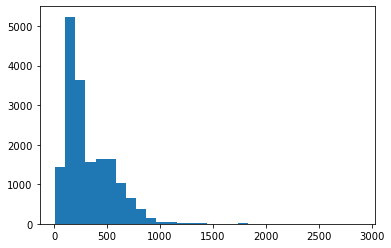

In [80]:
plt.hist(df.wordcount, density=False, bins=30)

(array([7495., 3069., 1509., 1000.,  577.,  387.,  323.,  257.,  179.,
         150.,  120.,  133.,  109.,   88.,   66.,   64.,   56.,   43.,
          51.,   48.,   43.,   42.,   48.,   41.,   33.,   32.,   39.,
          28.,   26.,   32.]),
 array([  1.        ,  14.26666667,  27.53333333,  40.8       ,
         54.06666667,  67.33333333,  80.6       ,  93.86666667,
        107.13333333, 120.4       , 133.66666667, 146.93333333,
        160.2       , 173.46666667, 186.73333333, 200.        ,
        213.26666667, 226.53333333, 239.8       , 253.06666667,
        266.33333333, 279.6       , 292.86666667, 306.13333333,
        319.4       , 332.66666667, 345.93333333, 359.2       ,
        372.46666667, 385.73333333, 399.        ]),
 <a list of 30 Patch objects>)

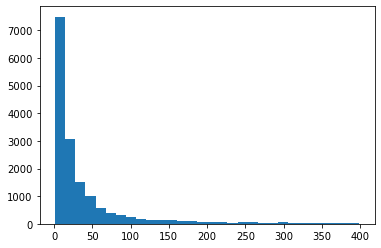

In [83]:
#plt.hist(df.pageviews, density=False, bins=30)
plt.hist(df[df.pageviews <400].pageviews, density=False, bins=30)

# man sieht: die allermeisten Artikel haben 0-50 pageviews, es gibt eber riesige Ausreißer nach oben, wie damit umgehen?

(array([4094., 1352.,  928.,  689.,  562.,  501.,  434.,  386.,  368.,
         333.,  281.,  277.,  265.,  254.,  258.,  199.,  195.,  180.,
         175.,  152.,  166.,  125.,  126.,  116.,  119.,  109.,  108.,
         122.,   87.,  102.]),
 array([   0.        ,  133.23333333,  266.46666667,  399.7       ,
         532.93333333,  666.16666667,  799.4       ,  932.63333333,
        1065.86666667, 1199.1       , 1332.33333333, 1465.56666667,
        1598.8       , 1732.03333333, 1865.26666667, 1998.5       ,
        2131.73333333, 2264.96666667, 2398.2       , 2531.43333333,
        2664.66666667, 2797.9       , 2931.13333333, 3064.36666667,
        3197.6       , 3330.83333333, 3464.06666667, 3597.3       ,
        3730.53333333, 3863.76666667, 3997.        ]),
 <a list of 30 Patch objects>)

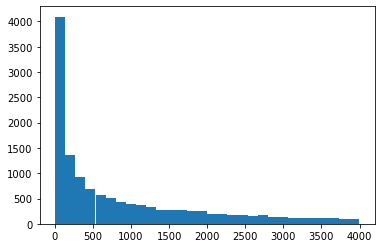

In [84]:
plt.hist(df[df.timeOnPage <4000].timeOnPage, density=False, bins=30)

(array([5603., 4231., 1897., 1057.,  713.,  508.,  333.,  297.,  217.,
         162.,  159.,  115.,  102.,   98.,   60.,   64.,   58.,   59.,
          47.,   57.,   50.,   38.,   25.,   35.,   23.,   24.,   28.,
          31.,   23.,   17.]),
 array([  0.        ,   4.96666667,   9.93333333,  14.9       ,
         19.86666667,  24.83333333,  29.8       ,  34.76666667,
         39.73333333,  44.7       ,  49.66666667,  54.63333333,
         59.6       ,  64.56666667,  69.53333333,  74.5       ,
         79.46666667,  84.43333333,  89.4       ,  94.36666667,
         99.33333333, 104.3       , 109.26666667, 114.23333333,
        119.2       , 124.16666667, 129.13333333, 134.1       ,
        139.06666667, 144.03333333, 149.        ]),
 <a list of 30 Patch objects>)

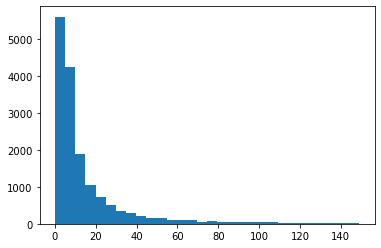

In [85]:
plt.hist(df[df.entrances <150].entrances, density=False, bins=30)

(array([2032., 1171., 1097., 1046., 1075.,  938.,  935.,  977.,  943.,
         929.,  897.,  899.,  700.,  652.,  564.,  429.,  376.,  300.,
         228.,  194.,  151.,  123.,   90.,   85.,   84.,   48.,   67.,
          40.,   30.,   30.]),
 array([  0.        ,  13.32745098,  26.65490196,  39.98235294,
         53.30980392,  66.6372549 ,  79.96470588,  93.29215686,
        106.61960784, 119.94705882, 133.2745098 , 146.60196078,
        159.92941176, 173.25686275, 186.58431373, 199.91176471,
        213.23921569, 226.56666667, 239.89411765, 253.22156863,
        266.54901961, 279.87647059, 293.20392157, 306.53137255,
        319.85882353, 333.18627451, 346.51372549, 359.84117647,
        373.16862745, 386.49607843, 399.82352941]),
 <a list of 30 Patch objects>)

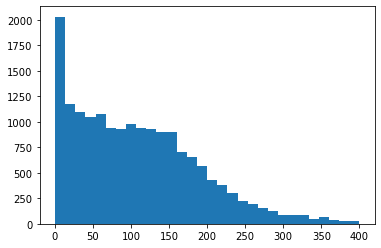

In [86]:
plt.hist(df[df.avgTimeOnPage <400].avgTimeOnPage, density=False, bins=30)

(array([1.6582e+04, 6.9800e+02, 1.5700e+02, 4.4000e+01, 2.2000e+01,
        1.8000e+01, 2.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.53504274,  3.07008547,  4.60512821,  6.14017094,
         7.67521368,  9.21025641, 10.74529915, 12.28034188, 13.81538462,
        15.35042735, 16.88547009, 18.42051282, 19.95555556, 21.49059829,
        23.02564103, 24.56068376, 26.0957265 , 27.63076923, 29.16581197,
        30.7008547 , 32.23589744, 33.77094017, 35.30598291, 36.84102564,
        38.37606838, 39.91111111, 41.44615385, 42.98119658, 44.51623932,
        46.05128205]),
 <a list of 30 Patch objects>)

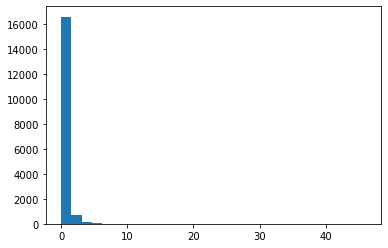

In [87]:
plt.hist(df['avgTimeOnPage/wordcount'], density=False, bins=30)

(array([1.651e+04, 7.430e+02, 1.730e+02, 5.500e+01, 1.800e+01, 1.600e+01,
        9.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.20502283, 0.41004566, 0.61506849, 0.82009132,
        1.02511416, 1.23013699, 1.43515982, 1.64018265, 1.84520548,
        2.05022831, 2.25525114, 2.46027397, 2.6652968 , 2.87031963,
        3.07534247, 3.2803653 , 3.48538813, 3.69041096, 3.89543379,
        4.10045662, 4.30547945, 4.51050228, 4.71552511, 4.92054795,
        5.12557078, 5.33059361, 5.53561644, 5.74063927, 5.9456621 ,
        6.15068493]),
 <a list of 30 Patch objects>)

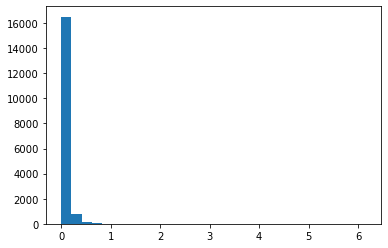

In [88]:
plt.hist(df['avgTimeOnPage/nr_char'], density=False, bins=30)

In [ ]:
import seaborn as sns
sns.boxplot(x=df.pageviews)

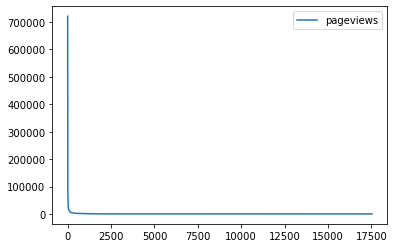

In [89]:
# sorted to see it better
#plt.plot(df.sort_values(by=['timeOnPage'], ascending = False).timeOnPage.to_numpy(), label = 'timeOnPage')
plt.plot(df.sort_values(by=['pageviews'], ascending = False).pageviews.to_numpy(), label = 'pageviews')
plt.legend()

## inspecting avgTimeOnPage

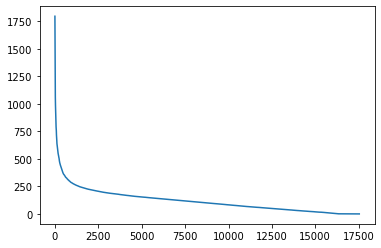

In [90]:
plt.plot(df.sort_values(by=['avgTimeOnPage'], ascending = False).avgTimeOnPage.to_numpy(), label = 'avgTimeOnPage')

In [91]:
df.sort_values(by=['avgTimeOnPage'], ascending = False).head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49364595,3,2,2,2,1796,,1796.0,33.333333,66.666667,66.666667,news,ticker,,ramelow-faellt-bei-ministerpraesidentenwahl-im...,https://www.general-anzeiger-bonn.de/news/tick...,200303-99-169093,dpacat:pl,Meldung,Deutschland,Ministerpräsident,,"Landtag__,__Regierung",,Erfurt (dpa) - Bei der Wahl des Thüringer Mini...,Ramelow fällt bei Ministerpräsidentenwahl im e...,,39,pl,Erfurt (dpa) - Bei der Wahl des Thüringer Mini...,38,6.526316,0,8,292,2.0,19.000000,46.051282,6.150685,1
51890351,3,2,2,2,1755,,1755.0,33.333333,66.666667,66.666667,news,digitale-welt,,unilever-stoppt-werbung-bei-facebook-und-twitt...,https://www.general-anzeiger-bonn.de/news/digi...,200626-99-581013,dpacat:pl,Zusammenfassung,USA,Facebook,"StopHateforProfit-Website__,__Tweet von The No...","Internet__,__Gesellschaft__,__Konsumgüter__,__...",Facebook und Twitter stehen wegen einer Flut a...,London/New York (dpa) - Facebook gerät wegen s...,Boykott weitet sich aus: Unilever und Honda st...,,462,pl,London/New York (dpa) - Facebook gerät wegen s...,461,6.381779,27,9,3464,25.0,18.440000,3.798701,0.506640,1
52026159,2,0,1,0,1743,,1743.0,50.000000,0.000000,0.000000,news,wirtschaft,ueberregional,commerzbank-mit-fuehrungsvakuum-wer-wird-zielk...,https://www.general-anzeiger-bonn.de/news/wirt...,200706-99-687756,dpacat:wi,Zusammenfassung,Deutschland,,"adhoc-Mitteilung Commerzbank 3.7.2020__,__Mitt...","Bank__,__Personalien",Die Commerzbank braucht rasch eine neue Führun...,Frankfurt/Main (dpa) - Die Commerzbank bemüht ...,Hängepartie oder Befreiungsschlag? Commerzbank...,,757,wi,Frankfurt/Main (dpa) - Die Commerzbank bemüht ...,786,6.118321,20,7,5665,39.0,20.153846,2.302510,0.307679,1
51680351,2,1,1,1,1720,,1720.0,50.000000,50.000000,50.000000,https:,,www.general-anzeiger-bonn.de,wo-beschaeftigte-im-arbeitsvertrag-minusstunde...,https://www.general-anzeiger-bonn.de/https://w...,200616-99-442082,dpacat:vm,Meldung,Deutschland,"Beruf__,__Ratgeber__,__Recht__,__Studierende__...",DGB Jugend mit Infos zur Arbeitszeit,Arbeit,In der Corona-Krise haben unter anderem Studie...,Berlin (dpa/tmn) - Vereinbarungen zu sogenannt...,Gleitzeit und Co.: Infos zu Minusstunden im Ve...,,196,vm,Berlin (dpa/tmn) - Vereinbarungen zu sogenannt...,194,6.716495,28,9,1526,11.0,17.636364,8.775510,1.127130,1
49958489,5,4,4,3,1693,,1693.0,20.000000,80.000000,60.000000,sport,fussball,,sc-freiburg-mit-training-in-zweiergruppen_aid-...,https://www.general-anzeiger-bonn.de/sport/fus...,200407-99-619960,dpacat:sp,Meldung,Deutschland,"Bundesliga__,__Freiburg__,__Corona__,__Covid-19","Kader SC Freiburg__,__Spielplan SC Freiburg__,...","Fußball__,__Krankheit__,__Gesundheit",,Freiburg (dpa) - In Zweiergruppen und ohne Zwe...,SC Freiburg mit Training in Zweiergruppen,,116,sp,Freiburg (dpa) - In Zweiergruppen und ohne Zwe...,117,6.564103,0,6,895,7.0,16.714286,14.594828,1.891620,1
49635683,1,1,0,0,1688,,1688.0,100.000000,100.000000,0.000000,news,ticker,,corona-ezb-legt-notkaufprogramm-in-hoehe-von-7...,https://www.general-anzeiger-bonn.de/news/tick...,200319-99-386371,dpacat:wi,Meldung,International,,,"Gesundheit__,__Krankheit__,__Finanzen__,__EZB",,Frankfurt/Main (dpa) - Im Kampf gegen wirtscha...,Corona: EZB legt Notkaufprogramm in Höhe von 7...,,44,wi,Frankfurt/Main (dpa) - Im Kampf gegen wirtscha...,43,6.418605,0,11,325,2.0,21.500000,38.363636,5.193846,1
49862367,3,2,2,2,1683,,1683.0,33.333333,66.666667,66.666667,sport,mehr-sport,,ruder-em-verschoben-neuer-termin-im-herbst-gep...,https://www.general-anzeiger-bonn.de/sport/meh...,200

In [92]:
# just take articles with >= 10 pageviews and with ...
df_cut = df.loc[(df['pageviews'] >= 20) ]
#                & (df['avgTimeOnPage/wordcount'] <= 1)
#                & (df['avgTimeOnPage/wordcount'] >= 0.1)]

In [93]:
df_cut

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46567279,375158,128227,156740,70453,23780933,,108.878082,58.220270,34.179466,18.779554,wetter,,,das-wochenende-bringt-regen-mit-sich_aid-46567279,https://www.general-anzeiger-bonn.de/wetter/da...,200225-99-64031,dpacat:vm,Meldung,Deutschland,,Deutscher Wetterdienst,Wetter,,Offenbach (dpa) - Kurz vor Ende des meteorolog...,"Meteorologischer Winter endet mit Sturm, Glätt...",,183,vm,Offenbach (dpa) - Kurz vor Ende des meteorolog...,183,5.792350,0,8,1264,10.0,18.300000,0.594962,0.086138,218418
48612935,32,9,11,6,2294,,109.238095,65.625000,28.125000,18.750000,news,panorama,,weinstein-prozess-zeugin-bestaetigt-mimi-haley...,https://www.general-anzeiger-bonn.de/news/pano...,200128-99-659558,dpacat:vm,KORR-Bericht,USA,,,"Prozess (Gericht)__,__Kriminalität__,__Gesells...",Im größten Prozess der MeToo-Ära stehen zwei F...,"New York (dpa) - Harvey Weinstein blickt auf, ...",Rotunno vs. Illuzzi: Zwei Frauen im Zentrum de...,,642,vm,"New York (dpa) - Harvey Weinstein blickt auf, ...",683,5.672035,36,9,4636,30.0,22.766667,0.170153,0.023563,21
48619167,350,44,82,25,45996,,171.626866,76.571429,12.571429,7.142857,news,politik,ausland,palaestinenser-weisen-trumps-nahost-plan-schar...,https://www.general-anzeiger-bonn.de/news/poli...,200128-99-675159,dpacat:pl,Zusammenfassung,"USA__,__Palästinensische Autonomiegebiete__,__...",Nahost,,"Konflikte__,__Internationale Beziehung",Der Nahost-Plan von US-Präsident Trump stellt ...,Washington (dpa) - Die Palästinenserführung ha...,Palästinenser weisen Trumps Nahost-Plan scharf...,,959,pl,Washington (dpa) - Die Palästinenserführung ha...,998,6.095190,35,6,7167,59.0,16.915254,0.178964,0.023947,268
48619407,794,333,392,225,66806,,166.184080,50.629723,41.939547,28.337531,news,panorama,,zahl-der-virus-faelle-steigt-auf-mehr-als-6000...,https://www.general-anzeiger-bonn.de/news/pano...,200129-99-687125,dpacat:vm,Zusammenfassung,"China__,__Deutschland",,"Gesundheitskommission__,__WHO__,__Video mit In...","Krankheit__,__Gesundheit__,__Wissenschaft","Hauptsächlich, aber nicht nur in China breitet...",Peking/München (dpa) - Gute Nachrichten von de...,Coronavirus breitet sich aus - Patienten in De...,,874,vm,Peking/München (dpa) - Gute Nachrichten von de...,893,6.104143,29,10,6435,53.0,16.849057,0.190142,0.025825,402
48619435,28,10,12,7,3684,,230.250000,57.142857,35.714286,25.000000,news,wirtschaft,ueberregional,rekordzahlen-fuer-apple-im-weihnachtsgeschaeft...,https://www.general-anzeiger-bonn.de/news/wirt...,200128-99-675269,dpacat:wi,Zusammenfassung,USA,Apple,Apple zum Geschäft im vergangenen Quartal,"Computer__,__Internet__,__Telekommunikation",Das iPhone-Geschäft wächst nach einer längeren...,Cupertino (dpa) - Apple hat das vergangene Wei...,Rekordzahlen für Apple im Weihnachtsgeschäft,,245,wi,Cupertino (dpa) - Apple hat das vergangene Wei...,242,5.809917,29,5,1674,16.0,15.125000,0.939796,0.137545,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52098597,33,14,15,7,2968,,164.888889,54.545455,42.424242,21.212121,news,panorama,,erneut-demonstrationen-und-unruhen-in-serbien_...,https://www.general-anzeiger-bonn.de/news/pano...,200709-99-727676,dpacat:pl,Zusammenfassung,Serbien,"Regierung__,__Polizei__,__Gesundheit__,__Krank...","Bericht bei rs.n1info.com, Serb.__,__Bericht b...",Demonstration,"Bis Anfang Mai galt in Serbien ein Lockdown, d...",Belgrad (dpa) - Die inkonsequente Politik des ...,Unruhen in Serbien wegen Cor

In [94]:
df_cut_sorted = df_cut.sort_values(by = ['stickiness'], ascending = False)
df_cut_sorted

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51206017,26,1,1,1,1176,,47.040000,96.153846,3.846154,3.846154,ratgeber,familie,,regelmaessige-bewegung-beugt-stuerzen-im-alter...,https://www.general-anzeiger-bonn.de/ratgeber/...,200518-99-97597,dpacat:vm,Zusammenfassung,Deutschland,"Senioren__,__Gesundheit__,__Ratgeber__,__Beweg...",Tipps gegen Bewegungsmangel,Familie,Die Angst vor dem Hinfallen kann ältere Mensch...,Berlin (dpa/tmn) - Bewegung ist gut für den Kö...,Im Alter: Regelmäßige Bewegung beugt Stürzen vor,,269,vm,Berlin (dpa/tmn) - Bewegung ist gut für den Kö...,265,5.894340,27,7,1878,20.0,13.250000,0.174870,0.025048,25
49402415,25,1,1,1,414,,17.250000,96.000000,4.000000,4.000000,ratgeber,essen-und-trinken,,lidl-ruft-reispfanne-zurueck_aid-49402415,https://www.general-anzeiger-bonn.de/ratgeber/...,200305-99-207855,dpacat:vm,Meldung,Deutschland,Rückrufe,,"Lebensmittel__,__Verbraucher",,Neckarsulm (dpa) - Wegen der nicht deklarierte...,Lidl ruft Reispfanne wegen nicht deklarierten ...,,94,vm,Neckarsulm (dpa) - Wegen der nicht deklarierte...,95,6.515789,0,8,728,5.0,19.000000,0.183511,0.023695,24
51240359,26,2,2,2,509,,21.208333,92.307692,7.692308,7.692308,news,kultur-und-medien,ueberregional,kupferstich-kabinett-richtet-jubilaeumsschau-e...,https://www.general-anzeiger-bonn.de/news/kult...,200515-99-74788,dpacat:ku,Meldung,Deutschland,,,"Museen__,__Kunst",,Dresden (dpa) - Mit Verspätung wegen Corona ho...,Kupferstich-Kabinett Dresden richtet Jubiläums...,,262,ku,Dresden (dpa) - Mit Verspätung wegen Corona ho...,268,5.455224,0,5,1754,12.0,22.333333,0.080948,0.012091,24
51237519,24,2,2,1,1154,,52.454545,91.666667,8.333333,4.166667,freizeit,kino,,roland-emmerich-dreht-sci-fi-film-mit-halle-be...,https://www.general-anzeiger-bonn.de/freizeit/...,200519-99-118931,dpacat:ku,Meldung,"USA__,__Deutschland",,"Variety__,__Hollywood Reporter","Film__,__Leute",,Los Angeles (dpa) - Hollywood-Regisseur Roland...,Roland Emmerich dreht Sci-Fi-Film «Moonfall» m...,,178,ku,Los Angeles (dpa) - Hollywood-Regisseur Roland...,200,5.320000,0,10,1269,10.0,20.000000,0.294688,0.041335,22
49908709,24,2,2,1,1397,,63.500000,91.666667,8.333333,4.166667,news,panorama,,mehr-als-83700-corona-nachweise-in-deutschland...,https://www.general-anzeiger-bonn.de/news/pano...,200403-99-586782,dpacat:vm,Meldung,Deutschland,"Corona__,__Covid-19__,__Fallzahlen","Zahlen des RKI__,__Tabelle: Infektionszahlen n...","Gesundheit__,__Krankheit__,__Wissenschaft",,Berlin (dpa) - In Deutschland sind bis Freitag...,Mehr als 85 100 Corona-Nachweise in Deutschlan...,,160,vm,Berlin (dpa) - In Deutschland sind bis Freitag...,161,5.807453,0,11,1118,10.0,16.100000,0.396875,0.056798,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50405065,28,27,27,26,358,,358.000000,3.571429,96.428571,92.857143,https:,,www.general-anzeiger-bonn.de,patrick-esume-und-der-hsv-arbeiten-weiter-zusa...,https://www.general-anzeiger-bonn.de/https://w...,200506-99-956148,dpacat:sp,Meldung,Deutschland,"2. Bundesliga__,__Hamburger SV","Mitteilung Hamburger SV__,__Homepage Hamburger...",Fußball,,Hamburg (dpa) - Der Hamburger SV und Patrick E...,Patrick Esume und der HSV arbeiten weiter zusa...,,124,sp,Hamburg (dpa) - Der Hamburger SV und Patrick E...,129,5.937984,0,8,909,6.0,21.500000,2.887097,0.393839,1
51917199,20055,19378,19358,18920,89507,,128.417504,3.475443,96.624283,94.340563,https:,,www.general-anzeiger-bonn.de,corona-kennziffer-im-kreis-guetersloh-noch-deu..

In [95]:
for i in [0,1,2,3,4,5,400,401,402]:
    print(df_cut_sorted.iloc[i]['pageviews-exits'])
    print(df_cut_sorted.iloc[i]['avgTimeOnPage/wordcount'])
    print(df_cut_sorted.iloc[i]['stickiness'])
    print(df_cut_sorted.iloc[i].text_preprocessed)

25
0.17486988847583643
96.1538461538462
Berlin (dpa/tmn) - Bewegung ist gut für den Körper - das gilt auch im Alter. Gerade wer unsicher beim Gehen ist, sollte regelmäßig aktiv sein, um seine Beweglichkeit und seine Koordination zu trainieren. Sonst lassen die Muskelkraft und der Gleichgewichtssinn nach. Das erhöht etwa die Gefahr von Stürzen, warnt das Zentrum für Qualität in der Pflege (ZQP). Wer stürzt, ist durch diese Erfahrung eventuell verunsichert und bewegt sich noch weniger. Das könne zu einem Teufelskreis werden. Darum sind auch Angehörige gefragt. Sie sollten Ältere dazu motivieren, noch möglichst viel selbst zu schaffen - sich anziehen zum Beispiel. Das fördert die Selbstständigkeit und zugleich den Bewegungsradius. Wichtig ist: nicht überreden, drängen oder gar zwingen. Es muss freiwillig passieren. Augen und Ohren regelmäßig untersuchen lassen Wer gut sieht und hört, ist sicherer unterwegs. Aus dem Grund rät das ZQP, Brillen und Hörgeräte stets zu nutzen und die Augen und

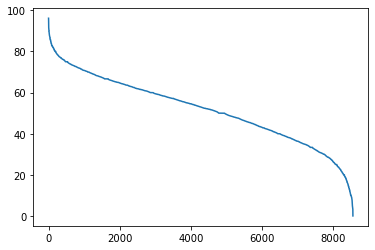

In [96]:
#plt.plot(df_cut.sort_values(by=['avgTimeOnPage/wordcount'], ascending = False)['avgTimeOnPage/wordcount'].to_numpy(), label = 'avgTimeOnPage/wordcount')
plt.plot(df_cut.sort_values(by=['stickiness'], ascending = False)['stickiness'].to_numpy(), label = 'stickiness')

(array([4.131e+03, 2.670e+03, 9.920e+02, 3.750e+02, 1.660e+02, 7.600e+01,
        4.000e+01, 2.900e+01, 2.600e+01, 1.500e+01, 9.000e+00, 9.000e+00,
        2.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  0.38699187,  0.77398374,  1.16097561,  1.54796748,
         1.93495935,  2.32195122,  2.70894309,  3.09593496,  3.48292683,
         3.8699187 ,  4.25691057,  4.64390244,  5.03089431,  5.41788618,
         5.80487805,  6.19186992,  6.57886179,  6.96585366,  7.35284553,
         7.7398374 ,  8.12682927,  8.51382114,  8.90081301,  9.28780488,
         9.67479675, 10.06178862, 10.44878049, 10.83577236, 11.22276423,
        11.6097561 ]),
 <a list of 30 Patch objects>)

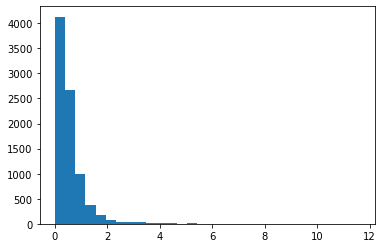

In [97]:
plt.hist(df_cut['avgTimeOnPage/wordcount'], density=False, bins=30)

(array([1189.,  308.,  520., 1255., 1801., 1313., 2067., 2339., 1885.,
        1833., 1694.,  705.,  356.,  104.,  165.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 <a list of 15 Patch objects>)

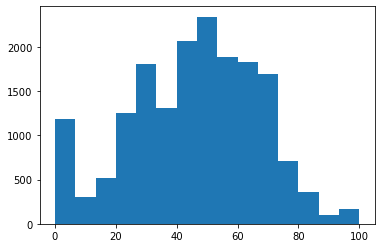

In [98]:
plt.hist(df['stickiness'], density=False, bins=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc33023bad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc330241590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc33023b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc330247090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3302475d0>],
 'means': []}

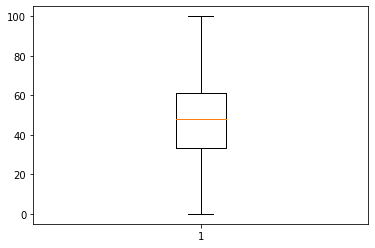

In [99]:
#plt.boxplot(df_cut['avgTimeOnPage/wordcount'])
#plt.boxplot(df_cut['pageviews'])
plt.boxplot(df.stickiness)

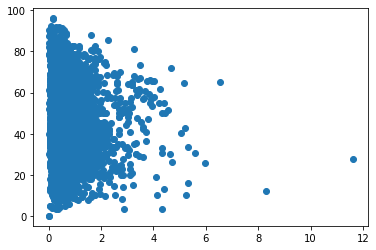

In [103]:
plt.scatter(df_cut['avgTimeOnPage/wordcount'], df_cut.stickiness)

In [108]:
# zeigt TimeOnPage/wordcount aufgespalten nach xxx-Kategorien
for c in categories:
    print(c)
    tmp = utils.get_articles_where(df=df, meta_cat = 'category', label = c)
    print(np.mean(tmp['avgTimeOnPage/wordcount']))
    print(np.mean(tmp['stickiness']))

ku
0.4646175975162086
46.39733048910267
pl
0.4905542323481037
49.95968346389281
rs
0.5262159718905302
53.2841688311815
sp
0.5110934389137913
36.253692877291606
vm
0.5479846205334761
52.05610639732522
wi
0.5497739511003324
46.0303041350899


Bedeutung der Ressortkürzel:
* pl Politik
* wi Wirtschaft
* ku Kultur
* sp Sport
* vm Vermischtes
* rs Redaktioneller Service, wie Kurzdienst, Hinweise, etc.

Kommentar:
* ich glaube: avgTimeOnPage = timeOnPage/(pageviews - exits)
* stickiness = (pageviews-exits)/pageviews (wieviele der Besucher bleiben beim publisher?)